In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Loading Boston Dataset**

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

**Setting features and target variable**

In [3]:
X = boston['data']
y = boston['target']
cols = boston['feature_names']

**Creating a dataframe**

In [5]:
df = pd.DataFrame(X, columns = cols)
df['Price'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Finding feature with maximum skewness**

In [18]:
df.skew().idxmax()

'CRIM'

**Plotting the kde plot to view the skewness**

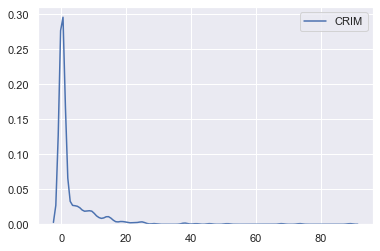

In [32]:
sns.kdeplot(df.CRIM)

**We will try to normalize the 'CRIM' feature**

**1. Log Transform**

The best approach is using the log transform. But log transform cannot be used for data having negative or 0 values. Since, log of 0 and negative numbers are not defined. Let us check if the CRIM dataset contains such values.

In [20]:
df.CRIM.min()

0.00632

As we can see the minimum value present in the 'CRIM' feature is 0.00632. So we can perform our log transformation.

We will make use of the numpy library to perform log transform.

In [21]:
log_CRIM = np.log(df.CRIM)

log_CRIM is our new transformed variable. Let us find the skewness and plot this newly transformed variable.

In [22]:
log_CRIM.skew()

0.4059344988496048

The new skewness coefficient value of ~ 0.406 seems to be a gaussian curve. Let us plot and confirm it.

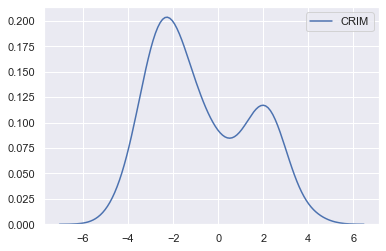

In [31]:
sns.kdeplot(log_CRIM)

**2. Square Root Transform**

The square root transform isn't the best option but it has an advantage over the log transform that it can accept 0 values. We can make use of the numpy library to get the square root transform.

In [34]:
sqrt_CRIM = np.sqrt(df.CRIM)

sqrt_CRIM is our new transformed variable. Let us find the skewness and plot this newly transformed variable.

In [35]:
sqrt_CRIM.skew()

2.024382103123676

The skewness of the new transformed variable is ~ 2.024 which is not better than what we obtained in the log transform. Let us plot the graph and observe the newly transformed variable.

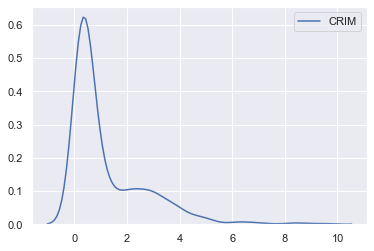

In [37]:
sns.kdeplot(sqrt_CRIM)

**3. Box Cox Transform**

Box Cox Transform is one of the powerful transformations that can be used when the dataset is skewed provided the values are positive real numbers.

We will make use of the scipy library to transform the feature into a box cox transformation.

In [38]:
from scipy import stats

boxcox_CRIM = stats.boxcox(df.CRIM)

boxcox_CRIM is our new transformed variable. Let us find the skewness and plot this newly transformed variable. We need to convert the numpy.ndarray to pandas Series.

In [45]:
boxcox_CRIM = pd.Series(boxcox_CRIM[0])
boxcox_CRIM.skew()

0.09364916787825833

When you compare the boxcox transformed variable skewness coefficient with the log transformed skewness coefficient, we can say that boxcox has performed better. Let us plot the graph and have a look at it.

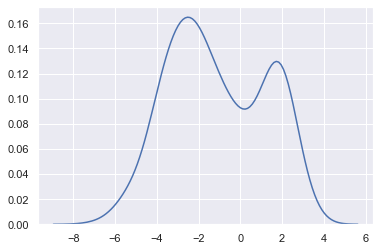

In [46]:
sns.kdeplot(boxcox_CRIM)